# Poetry and rap

**Author** : Elsa Bidant

**Date** : April 2025

## 1. Library import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
import statsmodels.formula.api as smf

## 2. Directed acyclic graph

C:\Users\elsab\AppData\Local\Temp\ipykernel_9352\3251669319.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


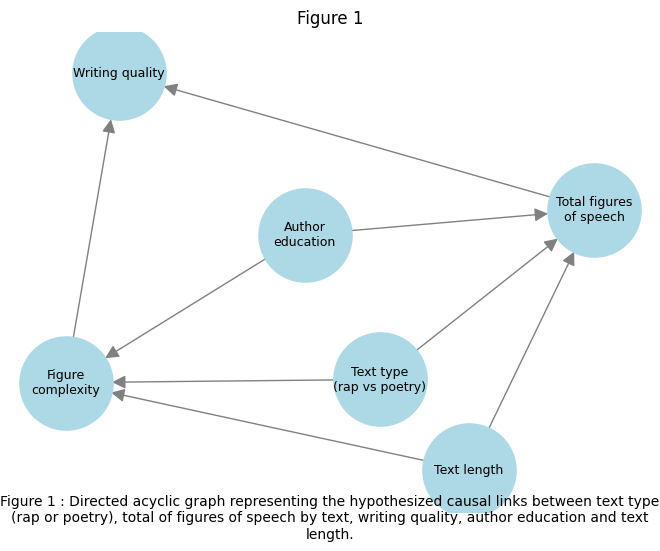

In [2]:
# Create a directed graph
G = nx.DiGraph()

# Define nodes
nodes = [
    'Text type\n(rap vs poetry)', 
    'Total figures\nof speech',
    'Figure\ncomplexity',
    'Writing quality',
    'Text length',
    'Author\neducation'
]
G.add_nodes_from(nodes)

# Define edges
edges = [
    ('Text type\n(rap vs poetry)', 'Total figures\nof speech'),
    ('Text type\n(rap vs poetry)', 'Figure\ncomplexity'),
    ('Total figures\nof speech', 'Writing quality'),
    ('Figure\ncomplexity', 'Writing quality'),
    ('Text length', 'Total figures\nof speech'),
    ('Text length', 'Figure\ncomplexity'),
    ('Author\neducation', 'Total figures\nof speech'),
    ('Author\neducation', 'Figure\ncomplexity'),
]
G.add_edges_from(edges)

# Layout (can use spring_layout or planar_layout)
pos = nx.spring_layout(G, seed=42)

# Draw the DAG
nx.draw(G, pos, with_labels = True, node_size = 4500, node_color = 'lightblue', arrows = True, arrowsize = 20, 
        font_size = 9, node_shape = 'o', edge_color = 'gray')

# Add description
description = "Figure 1 : Directed acyclic graph representing the hypothesized causal links between text type (rap or poetry), total of figures of speech by text, writing quality, author education and text length."
plt.figtext(0.5, -0.05, description, wrap = True, horizontalalignment = 'center', fontsize = 10)

plt.title("Figure 1", fontsize = 12)
plt.tight_layout()
plt.show()

## 3. Data import

In [3]:
df_rap = pd.read_csv("df_rap_annotated.csv")
df_rap.head()

,artist,title,year,lyrics,pageviews,contributors,url,topic,topic_clean,ranking,...,repetition,interjection,symbolism,alliteration,conditional_statement,synecdoche,simile,chiasmus,oxymoron,total_figures
0,Elh Kmer,Imparfait,2022.0,"\n\nWesh Heavy, amène le scooter, le sin-c'\nJ...",0,3,https://genius.com/Elh-kmer-imparfait-lyrics,bt-4,Rap poétique,2624.0,...,0,0,0,4,0,0,1,1,0,13
1,L’Entourage,Hail Mary (Freestyle),2011.0,"\nNique le Rap Jeu c'est que du crari, le Hip-...",65721,42,https://genius.com/Lentourage-hail-mary-freest...,bt-6,Egotrip/Méta-rap,1010.0,...,0,0,0,4,0,0,1,1,0,13
2,Klub des Loosers,De l’amour à la haine,2004.0,"\nC'est triste, mais je sais que cette fois la...",33623,23,https://genius.com/Klub-des-loosers-de-lamour-...,bt-1,Chansons d'amour,117.0,...,0,0,0,1,0,0,1,1,0,12
3,PLK,Un peu de haine,2019.0,"\n\nJunior à la prod, et non, y a rien de nouv...",64373,17,https://genius.com/Plk-un-peu-de-haine-lyrics,bt-2,Gangsta rap,NaN,...,3,0,0,2,0,0,1,0,0,11
4,Green Money,Freestyle “Trappes City”,NaN,"Han ! Haha, Green Mo' (Yes Sir)\n78 Phantom, y...",0,4,https://genius.com/Green-money-freestyle-trapp...,bt-2,Gangsta rap,1621.0,...,5,0,0,4,0,0,1,0,0,16


In [4]:
df_poe = pd.read_csv("df_poe_annotated.csv")
df_poe.head()

,title,author,date,text,url,annotation,summary_dict,contrast,metaphor,synesthesia,...,allusion,alliteration,apostrophe,synecdoche,foreshadowing,simile,imperative,chiasmus,oxymoron,total_figures
0,A la Belgique,Emile Verhaeren,NaN,"Hélas, depuis les jours des suprêmes combats, ...",https://www.poetica.fr/poeme-1945/emile-verhae...,"Here's an analysis of the poem ""A la Belgique""...","{'metaphor': 4, 'personification': 3, 'alliter...",0,4,0,...,0,2,0,0,0,0,0,0,0,17
1,Le Désespoir de la vieille,Charles Baudelaire,1869.0,La petite vieille ratatinée se sentit toute ré...,https://www.poetica.fr/poeme-1444/charles-baud...,"Here's an analysis of the poem ""Le Désespoir d...","{'simile': 1, 'metaphor': 1, 'personification'...",0,1,0,...,0,0,0,0,0,1,0,0,0,6
2,La Souris,Guillaume Apollinaire,1911.0,"Belles journées, souris du temps, Vous rongez...",https://www.poetica.fr/poeme-124/guillaume-apo...,"To analyze the poem ""La Souris"" by Guillaume A...","{'metaphor': 1, 'personification': 1, 'hyperbo...",0,1,0,...,0,1,1,0,0,0,0,0,0,6
3,Le Reniement de saint Pierre,Charles Baudelaire,1857.0,Qu’est-ce que Dieu fait donc de ce flot d’anat...,https://www.poetica.fr/poeme-3308/charles-baud...,"Here's an analysis of the poem ""Le Reniement d...","{'metaphor': 3, 'simile': 1, 'alliteration': 2...",0,3,0,...,0,2,0,0,0,1,0,0,0,12
4,L’isolement,Alphonse de Lamartine,NaN,"Souvent sur la montagne, à l’ombre du vieux ch...",https://www.poetica.fr/poeme-482/alphonse-de-l...,"```python\n{\n ""figures_of_speech"": {\n ""M...","{'metaphor': 3, 'simile': 2, 'personification'...",0,3,0,...,0,2,0,0,0,2,0,1,0,12


## 4. Data manipulation

In [5]:
# Deleting useless columns in rap dataset
columns_to_drop = df_rap.columns[7:33] 
df_rap.drop(["pageviews", "contributors"], axis = 1, inplace = True)
df_rap = df_rap.drop(columns = columns_to_drop)

In [6]:
# Renaming columns so they have the same name in both datasets
df_rap = df_rap.rename(columns = {
    "artist": "author",
    "year": "date",
    "lyrics" : "text"
})

In [7]:
# Adding a column for the type of the text
df_rap["type"] = "rap"
df_poe["type"] = "poetry"

In [8]:
# Combine the datasets
df = pd.concat([df_rap, df_poe], axis = 0)
df = df.fillna(0) # replace NaN by 0
df = df.astype({col: 'int' for col in df.select_dtypes(include = 'float').columns}) #replace float by integers
df.head()

,author,title,date,text,url,annotation,summary_dict,colloquial language,metaphor,irony,...,type,contrast,synesthesia,hypothetical condition,juxtaposition,color imagery,allusion,apostrophe,foreshadowing,imperative
0,Elh Kmer,Imparfait,2022,"\n\nWesh Heavy, amène le scooter, le sin-c'\nJ...",https://genius.com/Elh-kmer-imparfait-lyrics,"Here's an analysis of the poem ""Imparfait"" by ...","{'metaphor': 3, 'simile': 1, 'alliteration': 4...",0,3,0,...,rap,0,0,0,0,0,0,0,0,0
1,L’Entourage,Hail Mary (Freestyle),2011,"\nNique le Rap Jeu c'est que du crari, le Hip-...",https://genius.com/Lentourage-hail-mary-freest...,"To analyze the poem ""Hail Mary (Freestyle)"" by...","{'metaphor': 3, 'simile': 1, 'alliteration': 4...",0,3,0,...,rap,0,0,0,0,0,0,0,0,0
2,Klub des Loosers,De l’amour à la haine,2004,"\nC'est triste, mais je sais que cette fois la...",https://genius.com/Klub-des-loosers-de-lamour-...,"Here's an analysis of the poem ""De l’amour à l...","{'metaphor': 3, 'simile': 1, 'hyperbole': 2, '...",0,3,2,...,rap,0,0,0,0,0,0,0,0,0
3,PLK,Un peu de haine,2019,"\n\nJunior à la prod, et non, y a rien de nouv...",https://genius.com/Plk-un-peu-de-haine-lyrics,"To analyze the poem ""Un peu de haine"" by PLK, ...","{'repetition': 3, 'metaphor': 2, 'alliteration...",0,2,0,...,rap,0,0,0,0,0,0,0,0,0
4,Green Money,Freestyle “Trappes City”,0,"Han ! Haha, Green Mo' (Yes Sir)\n78 Phantom, y...",https://genius.com/Green-money-freestyle-trapp...,"To analyze the poem ""Freestyle 'Trappes City'""...","{'repetition': 5, 'metaphor': 3, 'alliteration...",0,3,0,...,rap,0,0,0,0,0,0,0,0,0


In [9]:
# Define the figures of speech by category
fundamental_figures = [
    'alliteration', 'repetition', 'rhetorical question', 'simile', 'metaphor',
    'personification', 'hyperbole', 'imagery', 'colloquial language', 'contrast'
]
elaborate_figures = [
    'anaphora', 'antithesis', 'oxymoron', 'paradox', 'chiasmus', 'ellipsis',
    'juxtaposition', 'refrain', 'apostrophe'
]
sophisticated_figures = [
    'synecdoche', 'metonymy', 'hypallage', 'hypothetical condition', 'synesthesia',
    'allusion', 'parallelism', 'irony', 'symbolism'
]

# Add new columns by summing the occurrences of figures in each category
df['fundamental_figures'] = df[fundamental_figures].sum(axis = 1)
df['elaborate_figures'] = df[elaborate_figures].sum(axis = 1)
df['sophisticated_figures'] = df[sophisticated_figures].sum(axis = 1)

In [10]:
# Calculate the length of each text
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

In [11]:
# Create the sophistication score
df['sophistication_score'] = (
    df['fundamental_figures'] * 1 +
    df['elaborate_figures'] * 2 +
    df['sophisticated_figures'] * 3
)

## 5. Data description

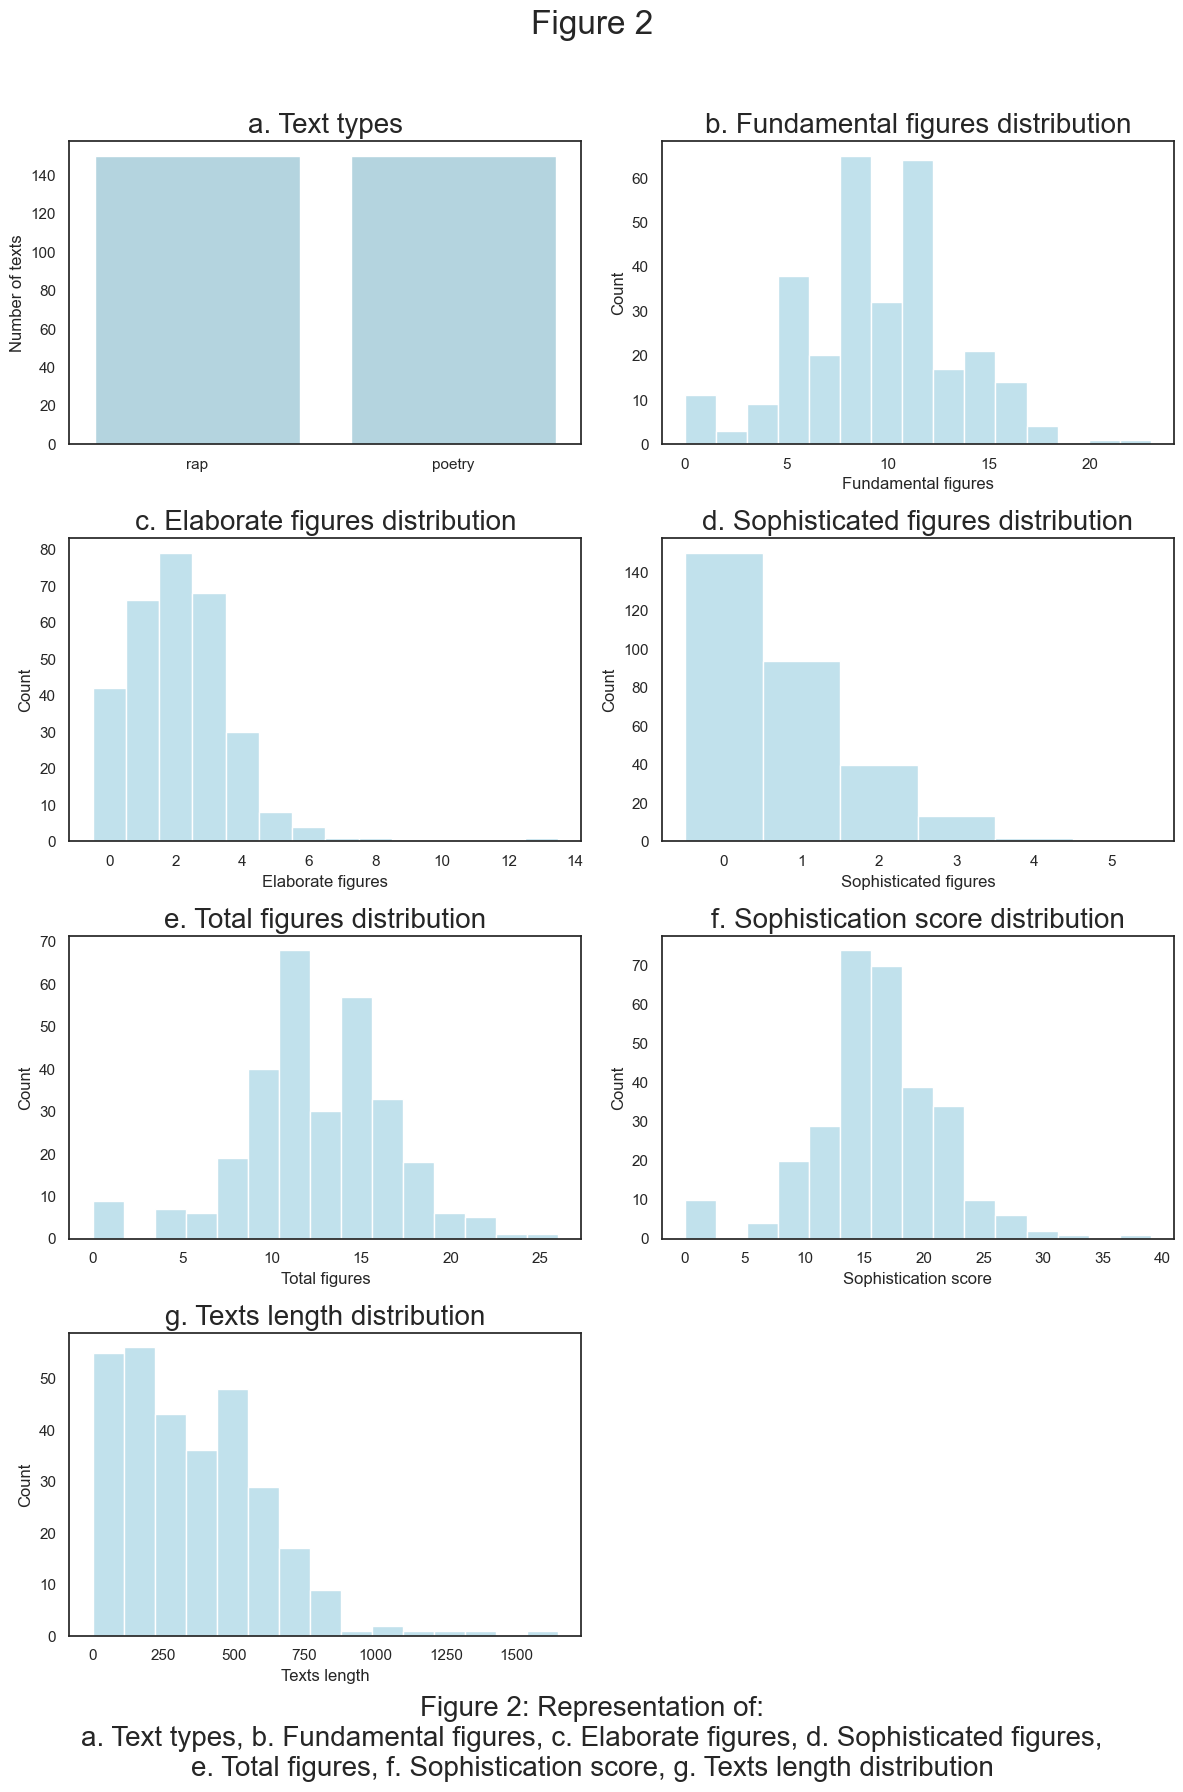

In [12]:
# Set a nice seaborn theme
sns.set_theme(style = "white", palette = "muted")

# Define a single custom color for all plots
main_color = '#add8e6'

# Create a figure with 4x2 subplots
fig, axes = plt.subplots(4, 2, figsize = (12, 18))
fig.suptitle('Figure 2', fontsize = 24)

# Plot 1: Count plot for 'type'
sns.countplot(data = df, x = 'type', ax = axes[0, 0], color = main_color)
axes[0, 0].set_title('a. Text types', fontsize = 20)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Number of texts')

# Plot 2: Histogram for fundamental figures
sns.histplot(data = df, x = 'fundamental_figures', bins = 15, ax = axes[0, 1], color = main_color)
axes[0, 1].set_title('b. Fundamental figures distribution', fontsize = 20)
axes[0, 1].set_xlabel('Fundamental figures')
axes[0, 1].set_ylabel('Count')

# Plot 3: Histogram for elaborate figures
sns.histplot(data = df, x = 'elaborate_figures', bins = 15, discrete = True, ax = axes[1, 0], color = main_color)
axes[1, 0].set_title('c. Elaborate figures distribution', fontsize = 20)
axes[1, 0].set_xlabel('Elaborate figures')
axes[1, 0].set_ylabel('Count')

# Plot 4: Histogram for sophisticated figures
sns.histplot(data = df, x = 'sophisticated_figures', bins = 15, discrete = True, ax = axes[1, 1], color = main_color)
axes[1, 1].set_title('d. Sophisticated figures distribution', fontsize = 20)
axes[1, 1].set_xlabel('Sophisticated figures')
axes[1, 1].set_ylabel('Count')

# Plot 5: Histogram for total figures
sns.histplot(data = df, x = 'total_figures', bins = 15, ax = axes[2, 0], color = main_color)
axes[2, 0].set_title('e. Total figures distribution', fontsize = 20)
axes[2, 0].set_xlabel('Total figures')
axes[2, 0].set_ylabel('Count')

# Plot 6: Histogram for sophistication score
sns.histplot(data = df, x = 'sophistication_score', bins = 15, ax = axes[2, 1], color = main_color)
axes[2, 1].set_title('f. Sophistication score distribution', fontsize = 20)
axes[2, 1].set_xlabel('Sophistication score')
axes[2, 1].set_ylabel('Count')

# Plot 7: Histogram for text length
sns.histplot(data = df, x = 'text_length', bins = 15, ax = axes[3, 0], color = main_color)
axes[3, 0].set_title('g. Texts length distribution', fontsize = 20)
axes[3, 0].set_xlabel('Texts length')
axes[3, 0].set_ylabel('Count')

# Remove unused subplot (bottom-right)
fig.delaxes(axes[3, 1])

# Add description
description = (
    "Figure 2: Representation of:\n"
    "a. Text types, b. Fundamental figures, c. Elaborate figures, d. Sophisticated figures,\n"
    "e. Total figures, f. Sophistication score, g. Texts length distribution"
)
plt.figtext(0.5, 0.001, description, wrap = True, horizontalalignment = 'center', fontsize = 20)

# Adjust spacing
plt.tight_layout(rect = [0, 0.04, 1, 0.96])
plt.show()


## 6. Data modelling

## 6.1. Data normalization

In [13]:
# Selection of numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Standardization
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


## 6.2. Total of figures of speech

We compute the following multivariate linear model:

$Total\ figures\ of\ speech_{i} = \beta_{0} + \beta_{1} Text\ type_{i} + \beta_{2} Text\ length_{i} +\epsilon_{i}$

In [14]:
# Convert the text type into a binary variable
df['text_type_binary'] = df['type'].map({'poetry': 0, 'rap': 1})

# Multivariate linear regression with 2 predictors: text type and text length
model_total = smf.ols(
    formula = "total_figures ~ text_type_binary + text_length",
    data = df
).fit()

# Model summary
print(model_total.summary())


                            OLS Regression Results                            
Dep. Variable:          total_figures   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     36.38
Date:                Sat, 03 May 2025   Prob (F-statistic):           7.39e-15
Time:                        11:59:45   Log-Likelihood:                -392.81
No. Observations:                 300   AIC:                             791.6
Df Residuals:                     297   BIC:                             802.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1242      0.079  

## 6.3. Sophistication of figures of speech

We compute the following multivariate linear model:

$Sophistication\ score_{i} = \beta_{0} + \beta_{1} Text\ type_{i} + \beta_{2} Text\ length_{i} +\epsilon_{i}$

In [15]:
# Convert the text type into a binary variable
df['text_type_binary'] = df['type'].map({'poetry': 0, 'rap': 1})

# Multivariate linear regression with 2 predictors: text type and text length
model_soph = smf.ols(
    formula = "sophistication_score ~ text_type_binary + text_length",
    data = df
).fit()

# Model summary
print(model_soph.summary())


                             OLS Regression Results                             
Dep. Variable:     sophistication_score   R-squared:                       0.162
Model:                              OLS   Adj. R-squared:                  0.156
Method:                   Least Squares   F-statistic:                     28.61
Date:                  Sat, 03 May 2025   Prob (F-statistic):           4.32e-12
Time:                          11:59:45   Log-Likelihood:                -399.25
No. Observations:                   300   AIC:                             804.5
Df Residuals:                       297   BIC:                             815.6
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           

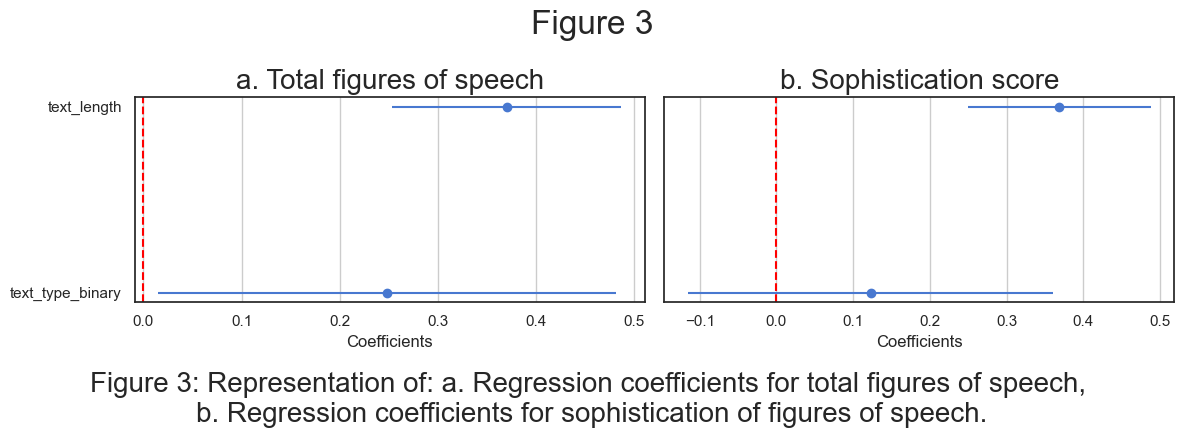

In [16]:
# Figure 3

# Variables to display
variables = ['text_type_binary', 'text_length']
y_pos = np.arange(len(variables))

# Figure 3a
# Coefficients and confidence intervals for total figures of speech
coefs1 = model_total.params[variables]
ci1 = (model_total.conf_int().loc[variables][1] - model_total.conf_int().loc[variables][0]) / 2

# Figure 3b
# Coefficients and confidence intervals for sophistication score
coefs2 = model_soph.params[variables]
ci2 = (model_soph.conf_int().loc[variables][1] - model_soph.conf_int().loc[variables][0]) / 2

# Create side-by-side panel
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4), sharey = True)

# Figure a: total figures of speech
axes[0].errorbar(coefs1, y_pos, xerr = ci1, fmt = 'o')
axes[0].axvline(x = 0, linestyle = '--', color = 'red')
axes[0].set_title('a. Total figures of speech', fontsize = 20)
axes[0].set_xlabel('Coefficients')
axes[0].set_yticks(y_pos, variables)
axes[0].grid(axis = 'x')


# Figure b: sophistication score
axes[1].errorbar(coefs2, y_pos, xerr = ci2, fmt = 'o')
axes[1].axvline(x = 0, linestyle = '--', color = 'red')
axes[1].set_title('b. Sophistication score', fontsize = 20)
axes[1].set_xlabel('Coefficients')
axes[1].set_yticks(y_pos, variables)
axes[1].grid(axis = 'x')


# Explanatory caption below the plots
fig.text(0.5, -0.05,
         "Figure 3: Representation of: a. Regression coefficients for total figures of speech, "
         "\nb. Regression coefficients for sophistication of figures of speech.",
         ha = 'center', fontsize = 20)

fig.suptitle('Figure 3', fontsize = 24) 

plt.tight_layout()
plt.subplots_adjust(bottom = 0.25)
plt.show()